# Customer Data analysis on Product Review

Product Review has following Columns:

1. ProductId: This column contains unique identifiers or codes for different products.

2. UserId: This column appears to contain unique identifiers for users or customers who have interacted with these products.

3. ProfileName: This column contains the names or profiles associated with the users or customers.

4. HelpfulnessNumerator: Number of People who found the review is Helpful

5. HelpfulnessDenominator: Number of People who found the review is irrelevent or not Helpful

6. Score: This column contains numerical ratings or scores given by users to the products.

7. Time: This column appears to represent timestamps, possibly indicating when user interactions or reviews were recorded.

8. Summary: This column contains short summaries or titles related to the products or reviews.

9. Text: This column contains longer text descriptions or reviews provided by users for the products.

## Objective
1. How Company recommend products

2. Which product has good number of reviews

3. Understand the behaviour of Users

5. Analyse frequent Users

6. Sentiment Analysis

In [2]:
# Import Different library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
Data = pd.read_csv('D:\Data for Preprocessing\Reviews.csv')

In [8]:
Data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Data Prepration

In [9]:
Data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

    Remove irrelavant rows based on Above condition

In [34]:
# HelpfulnessNumerator - Number of People who found the review is Helpful

# HelpfulnessDenominator - Number of People who found the review is irrelevent or not Helpful

# HelpfulnessNumerator < HelpfulnessDenominator--->  Condition need to be met 

In [14]:
Data['HelpfulnessNumerator']> Data['HelpfulnessDenominator'] # Invalid Rows

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [15]:
Data[Data['HelpfulnessNumerator']> Data['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [16]:
df_Valid = Data[Data['HelpfulnessNumerator']<= Data['HelpfulnessDenominator']]

In [17]:
# Remove duplicate data based on 
# UserId + ProfileName + Time + Text

In [18]:
data = df_Valid.drop_duplicates(subset=['UserId', 'ProfileName', 'Time', 'Text'])

In [19]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [20]:
pd.to_datetime(data['Time'])

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

In [21]:
data['Time'] = pd.to_datetime(data['Time'], unit='s')

C:\Users\JITENDRA\AppData\Local\Temp/ipykernel_4168/145857406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'], unit='s')


In [22]:
data['Time']

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

In [23]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

### Ques 1 : Analyse to what user, Company can recommend more products?

In [24]:
# Filter the data based on Average Score and Number of Product Purchased

In [25]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [44]:
recommend_df = data.groupby(['UserId']).agg({'Summary': 'count', 'Score': 'mean','ProductId': 'count'})\
              .rename({'Summary': 'Number_of_Summaries', 'Score': 'Avg_Score', 'ProductId': 'Number_of_Product_Purchased'}, axis=1)\
              .sort_values(by=('Number_of_Summaries' ), ascending=False)

In [45]:
recommend_df

,Number_of_Summaries,Avg_Score,Number_of_Product_Purchased
UserId,,,
AY12DBB0U420B,329,4.659574,329
A3OXHLG6DIBRW8,278,4.546763,278
A281NPSIMI1C2R,259,4.787645,259
A1YUL9PCJR3JTY,214,4.621495,214
A1Z54EM24Y40LL,211,4.383886,211
...,...,...,...
A2E837KYGNO5O5,1,5.000000,1
AZZZOVIBXHGDR,1,2.000000,1
A15AMT9T9A1309,0,3.000000,1


In [46]:
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [47]:
recommend_df['Number_of_Product_Purchased'].nlargest(10).values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

    Top 10 users

Text(0, 0.5, 'Number of Product Purchased')

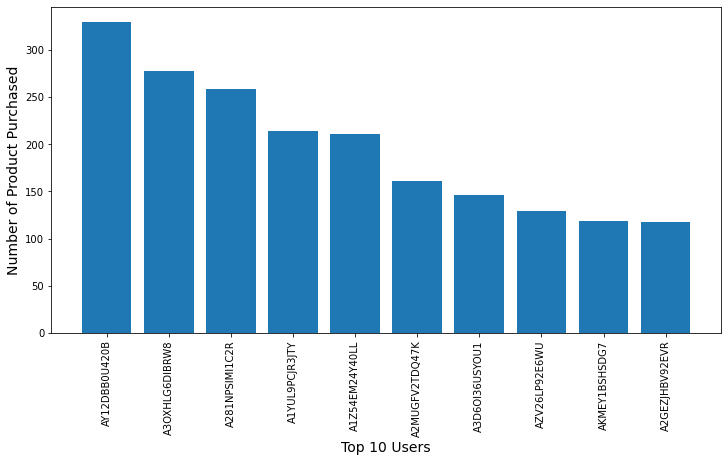

In [48]:
plt.figure(figsize=(12, 6))
plt.bar(recommend_df.index[0:10], recommend_df['Number_of_Product_Purchased'].nlargest(10).values)
plt.xticks(rotation = 'vertical')
plt.xlabel('Top 10 Users', fontsize = 14)  
plt.ylabel('Number of Product Purchased', fontsize = 14)

### Ques 2 : Which Product has Good number of Reviews

In [49]:
# Based on frequency of Products sold and Review Score
# For this case choose those Products whose having frequency greater than 500

In [50]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [51]:
Prod_count =  data['ProductId'].value_counts(ascending=False).to_frame()

In [52]:
Prod_count

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [53]:
Product_name  = Prod_count[Prod_count['ProductId']>500].index

In [54]:
Product_name

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

In [55]:
fre_Prod_df = data[data['ProductId'].isin(Product_name)]

In [56]:
fre_Prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

    Top Products 

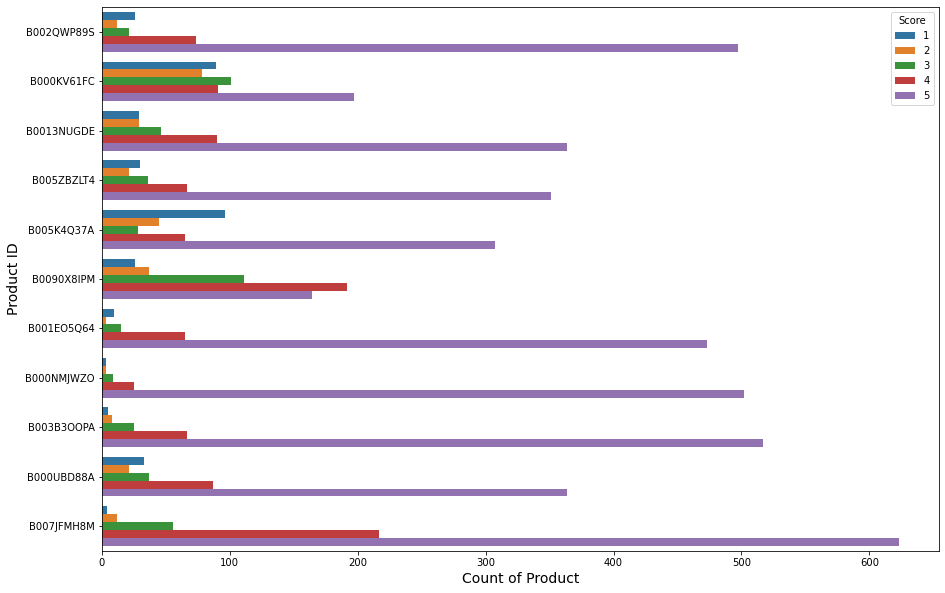

In [57]:
plt.figure(figsize=(15, 10)) 
sns.countplot(y = 'ProductId', data = fre_Prod_df, hue= 'Score')
plt.xlabel('Count of Product',  fontsize = 14)
plt.ylabel('Product ID', fontsize = 14)

plt.show()

### Ques 3 : Is there any difference between behaviour of frequent buyers and non-frequent buyers

In [58]:
# Frequent Buyer - for this case frequency of Purchasing the product is more than 50
# Not Frequent Buyer - frequency of Purchasing the product is less than 50

In [59]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [60]:
x = data['UserId'].value_counts()

In [61]:
x

AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [62]:
data['viewer_type'] = data['UserId'].apply(lambda user : "Frequent" if x[user]>=50 else "Not Frequent")

In [63]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent


In [64]:
score_percentages = data.groupby(['Score', 'viewer_type']).size() / data.groupby('viewer_type').size() * 100

In [65]:
score_percentages

Score  viewer_type 
1      Frequent         3.764009
       Not Frequent     9.350462
2      Frequent         3.954324
       Not Frequent     5.313247
3      Frequent         9.674350
       Not Frequent     7.504818
4      Frequent        21.146120
       Not Frequent    14.069388
5      Frequent        61.461197
       Not Frequent    63.762085
dtype: float64

In [66]:
score_percentages = score_percentages.reset_index(name='Percentage')

In [67]:
score_percentages

,Score,viewer_type,Percentage
0,1,Frequent,3.764009
1,1,Not Frequent,9.350462
2,2,Frequent,3.954324
3,2,Not Frequent,5.313247
4,3,Frequent,9.674350
5,3,Not Frequent,7.504818
6,4,Frequent,21.146120
7,4,Not Frequent,14.069388
8,5,Frequent,61.461197
9,5,Not Frequent,63.762085


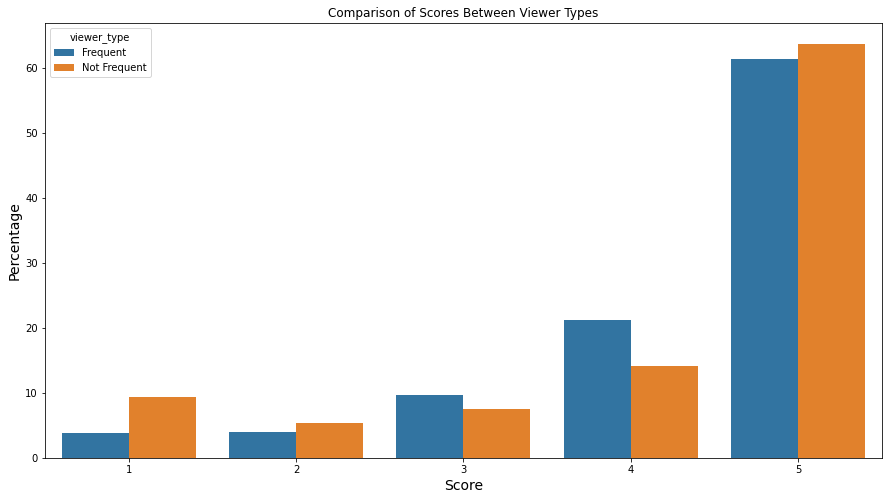

In [68]:
plt.figure(figsize=(15, 8)) 
sns.barplot(data=score_percentages, x='Score', y='Percentage', hue='viewer_type')

plt.xlabel('Score',  fontsize = 14)
plt.ylabel('Percentage',  fontsize = 14)
plt.title('Comparison of Scores Between Viewer Types')

plt.show()

    As observed, there exists minimal disparity between frequent and infrequent buyers in relation to a given review score.

### Ques 4 : Are frequnet user more verbose or Do frequent users utilise more words

In [69]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [70]:
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [71]:
data.loc[:, ['UserId', 'ProductId', 'Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [72]:
len(data['Text'][0].split(' '))

49

In [73]:
def calculate_length(text):
    return len(text.split(' '))

In [74]:
data['Text_Length'] = data['Text'].apply(calculate_length)

In [75]:
fre_data = data[data['viewer_type'] == 'Frequent']
non_fre_data = data[data['viewer_type'] == 'Not Frequent']

(0.0, 600.0)

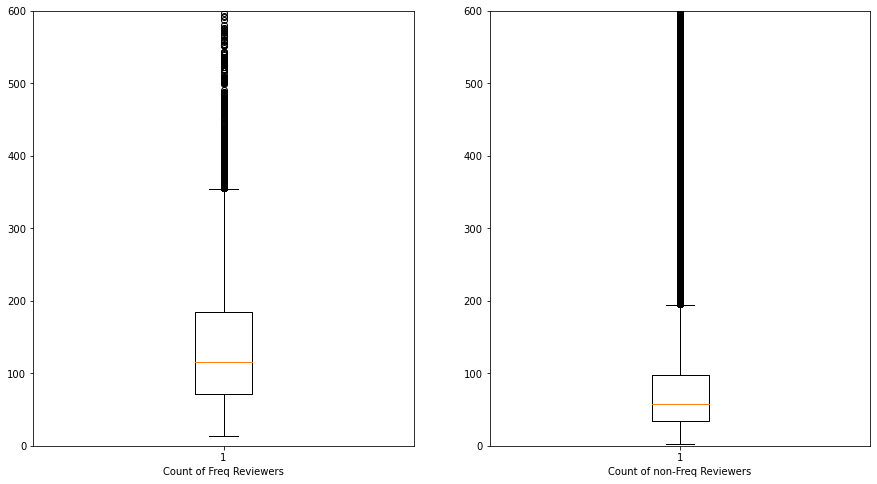

In [76]:
fig = plt.figure(figsize=(15, 8)) 

ax1 = fig .add_subplot(121)
ax1.boxplot(fre_data['Text_Length'])
ax1.set_xlabel('Count of Freq Reviewers')
ax1.set_ylim(0,600)

ax2 = fig .add_subplot(122)
ax2.boxplot(non_fre_data['Text_Length'])
ax2.set_xlabel('Count of non-Freq Reviewers')
ax2.set_ylim(0,600)



    The maximum allowable length for feedback provided by frequent reviewers is 350 characters, whereas for non-frequent reviewers, it is limited to 200 characters.
    
    50% of the frequent reviewer have a feedback length in the interval of 90 to 200 characters, while for Non-frequent that range is from 50 to 100 characters.

### Ques 5 : Sentiment Analysis

In [77]:
pip install textblob

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from textblob import TextBlob

In [ ]:
data['Summary'][0]

'Good Quality Dog Food'

In [ ]:
TextBlob('Good Quality Dog Food').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [ ]:
TextBlob('Good Quality Dog Food').sentiment.polarity 

0.7

In [ ]:
sample = data[0:50000]

In [ ]:
polarity = []
for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)
        

In [ ]:
sample['polarity'] = polarity

In [ ]:
sample.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_Length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0


In [ ]:
sample_negative = sample[sample['polarity'] < 0]
sample_positive = sample[sample['polarity'] > 0]

In [ ]:
sample_negative['Summary']

16                  poor taste
26             Nasty No flavor
57       How can you go wrong!
61            pretty expensive
62              stale product.
                 ...          
54185                 Horrible
54186            Horrible idea
54191                    STALE
54212             Disappointed
54251      Just not very good!
Name: Summary, Length: 4659, dtype: object

In [ ]:
sample_positive['Summary']

0                                Good Quality Dog Food
4                                          Great taffy
5                                           Nice Taffy
6        Great!  Just as good as the expensive brands!
7                               Wonderful, tasty taffy
                             ...                      
54248                 My favorite nescafe dolce flavor
54249                                  My 2nd Favorite
54250                      Best of 5 flavors available
54252                                 pricey but good.
54253                         Best I have found so far
Name: Summary, Length: 29154, dtype: object

In [ ]:
from collections import Counter

In [ ]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [ ]:
Counter(sample_positive['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]